# 数据读取


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["SimHei"]  # 指定中文字体

data = pd.read_csv('E:\\大模型课程\\05_尚硅谷大模型技术之Numpy&Pandas\\2.资料\\data\\house_sales.csv')
print('数据基本信息：')
data.info()



数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  int64  
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  int64  
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18 

# 数据清洗


In [3]:
# 缺失值处理
missing_values = data.isnull().sum()
print('各列缺失值数量：')
print(missing_values)

data = data.dropna()

# 数据合法性验证
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
data

各列缺失值数量：
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1,2005-10-24,476315.91,8,4,1921,1856,3,0,0,3,7,1864,87,1979,2010,98001,47.341860,-122.183176
1,2,1937-07-18,698980.64,4,4,1503,6659,2,0,1,1,7,2177,100,1937,0,98010,47.532967,-122.026116
2,3,2008-08-01,663024.75,3,3,3494,3112,2,0,3,4,12,2030,1084,1968,1989,98006,47.345444,-121.635418
3,4,2011-08-31,629698.77,8,1,2618,8264,1,0,2,4,7,1576,1108,1911,1999,98010,47.749573,-121.794627
4,5,2011-02-26,658139.54,1,2,1661,3386,1,0,3,3,2,517,816,1900,0,98001,47.737984,-121.701806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1953-07-11,303685.99,3,2,2378,6259,1,0,4,4,13,2398,450,1927,1992,98010,47.394280,-121.689675
9996,9997,2016-01-03,336882.94,2,1,4837,6226,2,1,2,1,8,2198,1567,1986,2006,98003,47.530260,-122.444554
9997,9998,2021-11-12,423961.29,4,4,4750,1641,2,1,1,2,1,2442,380,2018,0,98004,47.020433,-122.275511
9998,9999,1969-09-03,394782.02,6,5,4108,7847,1,0,4,3,1,4226,1899,1912,0,98001,47.034089,-122.122351


# 日期字段的转换

In [5]:
data["date"] = pd.to_datetime(data["date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9930 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9930 non-null   int64         
 1   date           9930 non-null   datetime64[ns]
 2   price          9930 non-null   float64       
 3   bedrooms       9930 non-null   int64         
 4   bathrooms      9930 non-null   int64         
 5   sqft_living    9930 non-null   int64         
 6   sqft_lot       9930 non-null   int64         
 7   floors         9930 non-null   int64         
 8   waterfront     9930 non-null   int64         
 9   view           9930 non-null   int64         
 10  condition      9930 non-null   int64         
 11  grade          9930 non-null   int64         
 12  sqft_above     9930 non-null   int64         
 13  sqft_basement  9930 non-null   int64         
 14  yr_built       9930 non-null   int64         
 15  yr_renovated   9930 non-nu

# 添加房屋使用年限以及是否翻新特征

In [10]:
# 房龄
data["age"] = data["date"].dt.year - data["yr_built"]
# 是否翻新
data["is_renovated"] = data["yr_renovated"].apply(lambda x: 1 if x > 0 else 0 )

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,age,is_renovated
0,1,2005-10-24,476315.91,8,4,1921,1856,3,0,0,...,7,1864,87,1979,2010,98001,47.341860,-122.183176,26,1
1,2,1937-07-18,698980.64,4,4,1503,6659,2,0,1,...,7,2177,100,1937,0,98010,47.532967,-122.026116,0,0
2,3,2008-08-01,663024.75,3,3,3494,3112,2,0,3,...,12,2030,1084,1968,1989,98006,47.345444,-121.635418,40,1
3,4,2011-08-31,629698.77,8,1,2618,8264,1,0,2,...,7,1576,1108,1911,1999,98010,47.749573,-121.794627,100,1
4,5,2011-02-26,658139.54,1,2,1661,3386,1,0,3,...,2,517,816,1900,0,98001,47.737984,-121.701806,111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1953-07-11,303685.99,3,2,2378,6259,1,0,4,...,13,2398,450,1927,1992,98010,47.394280,-121.689675,26,1
9996,9997,2016-01-03,336882.94,2,1,4837,6226,2,1,2,...,8,2198,1567,1986,2006,98003,47.530260,-122.444554,30,1
9997,9998,2021-11-12,423961.29,4,4,4750,1641,2,1,1,...,1,2442,380,2018,0,98004,47.020433,-122.275511,3,0
9998,9999,1969-09-03,394782.02,6,5,4108,7847,1,0,4,...,1,4226,1899,1912,0,98001,47.034089,-122.122351,57,0


# 数值型字段的描述性指标

In [22]:
# data.describe(include=[np.number])
# 选择数值型列
numeric_columns = data.select_dtypes(include=[np.number]).columns
# 计算描述性统计信息
description = data[numeric_columns].describe(percentiles=[0.25, 0.5, 0.75])
print('数值型列的描述性统计：')
print(description)


数值型列的描述性统计：
                 id          price     bedrooms    bathrooms  sqft_living  \
count   9930.000000    9930.000000  9930.000000  9930.000000  9930.000000   
mean    5001.107049  501121.772151     4.496878     3.521349  2906.238671   
std     2885.966447   97124.951211     2.297853     1.727304  1210.034706   
min        1.000000  229983.900000     1.000000     1.000000   801.000000   
25%     2503.250000  433529.705000     2.000000     2.000000  1865.000000   
50%     5001.500000  501561.090000     4.000000     4.000000  2909.000000   
75%     7496.750000  567653.252500     7.000000     5.000000  3957.000000   
max    10000.000000  770223.220000     8.000000     6.000000  5000.000000   

           sqft_lot       floors   waterfront         view    condition  \
count   9930.000000  9930.000000  9930.000000  9930.000000  9930.000000   
mean    5520.495065     1.999295     0.498489     2.016314     2.985901   
std     2604.054446     0.819431     0.500023     1.418670     1.4161

# 统计相关性

In [24]:
correlation = data[numeric_columns].corr()
print('各特征与房价的相关性：')
print(correlation['price'])
correlation['price']


各特征与房价的相关性：
id               0.011216
price            1.000000
bedrooms         0.004881
bathrooms        0.008096
sqft_living      0.011616
sqft_lot         0.003644
floors          -0.005926
waterfront       0.001748
view            -0.002817
condition        0.001813
grade            0.004603
sqft_above      -0.005068
sqft_basement   -0.003476
yr_built         0.012998
yr_renovated    -0.000186
zipcode          0.007931
lat             -0.001472
long            -0.006436
age             -0.004177
is_renovated    -0.000069
Name: price, dtype: float64


id               0.011216
price            1.000000
bedrooms         0.004881
bathrooms        0.008096
sqft_living      0.011616
sqft_lot         0.003644
floors          -0.005926
waterfront       0.001748
view            -0.002817
condition        0.001813
grade            0.004603
sqft_above      -0.005068
sqft_basement   -0.003476
yr_built         0.012998
yr_renovated    -0.000186
zipcode          0.007931
lat             -0.001472
long            -0.006436
age             -0.004177
is_renovated    -0.000069
Name: price, dtype: float64

In [25]:
# 按照邮政编码分组分析
zipcode_stats = data.groupby('zipcode').agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'bedrooms': 'mean'
})
zipcode_stats.columns = ['avg_price', 'avg_sqft_living', 'avg_bedrooms']
print('不同邮政编码区域的统计信息：')
# print(zipcode_stats)
zipcode_stats


不同邮政编码区域的统计信息：


,avg_price,avg_sqft_living,avg_bedrooms
zipcode,,,
98001,502211.909176,2917.520854,4.357905
98002,497808.793483,2955.262821,4.554487
98003,497930.512592,2870.403689,4.547131
98004,498747.163954,2857.314854,4.407950
98005,503306.661532,2975.695481,4.548134
98006,505345.428558,2887.992944,4.599798
98007,502716.775391,2900.131553,4.358061
98008,499171.818208,2877.518519,4.499499
98009,500330.593340,2901.382627,4.472596


In [26]:
# 按是否翻新分组，计算每组的平均房价、平均居住面积、平均卧室数量
# renovation_stats = data.groupby('is_renovated').agg({
#     'price': 'mean',
#     'sqft_living': 'mean',
#     'bedrooms': 'mean'
# })
renovation_stats = data.groupby('is_renovated')[["price","sqft_living","bedrooms"]].mean()
renovation_stats.columns = ['avg_price', 'avg_sqft_living', 'avg_bedrooms']
print('是否翻新分组的统计信息：')
# print(renovation_stats)
renovation_stats


是否翻新分组的统计信息：


,avg_price,avg_sqft_living,avg_bedrooms
is_renovated,,,
0,501126.095841,2899.849035,4.506505
1,501111.467479,2921.467121,4.473935


In [27]:
# 按房屋使用年限分组（简单分为 5 个区间）
data['age_group'] = pd.cut(data['age'], bins=5)
age_stats = data.groupby('age_group').agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'bedrooms': 'mean'
})
print('按房屋使用年限分组的统计信息：')
print(age_stats)
age_stats


按房屋使用年限分组的统计信息：
                        price  sqft_living  bedrooms
age_group                                           
(-0.124, 24.8]  501594.625623  2912.909214  4.511300
(24.8, 49.6]    500933.820999  2912.564145  4.485583
(49.6, 74.4]    501518.890152  2867.016575  4.421271
(74.4, 99.2]    496723.141722  2910.078910  4.628407
(99.2, 124.0]   503413.042977  2926.920930  4.358140


C:\Users\fuxiaofeng\AppData\Local\Temp\ipykernel_10872\589111185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = data.groupby('age_group').agg({


,price,sqft_living,bedrooms
age_group,,,
"(-0.124, 24.8]",501594.625623,2912.909214,4.511300
"(24.8, 49.6]",500933.820999,2912.564145,4.485583
"(49.6, 74.4]",501518.890152,2867.016575,4.421271
"(74.4, 99.2]",496723.141722,2910.078910,4.628407
"(99.2, 124.0]",503413.042977,2926.920930,4.358140


In [28]:
# 按年份分组，计算每年的平均房价
yearly_avg_price = data.groupby(data['date'].dt.year)['price'].mean()
print('每年的平均房价：')
# print(yearly_avg_price)
yearly_avg_price

每年的平均房价：


date
1900    488884.680000
1902    513972.100000
1903    509519.793333
1905    522640.340000
1906    470978.868333
            ...      
2020    512492.021111
2021    494507.942625
2022    498970.821277
2023    502406.178047
2024    499999.391169
Name: price, Length: 123, dtype: float64

In [29]:
yearly_renovation_avg_price = data.groupby([data['date'].dt.year, 'is_renovated'])['price'].mean()
print('每年不同翻新情况的平均房价：')
# print(yearly_renovation_avg_price)
yearly_renovation_avg_price

每年不同翻新情况的平均房价：


date  is_renovated
1900  0               488884.680000
1902  0               513972.100000
1903  0               445335.310000
      1               637888.760000
1905  0               522640.340000
                          ...      
2022  1               484070.180990
2023  0               502393.039380
      1               502439.298437
2024  0               497149.856014
      1               505383.902403
Name: price, Length: 240, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

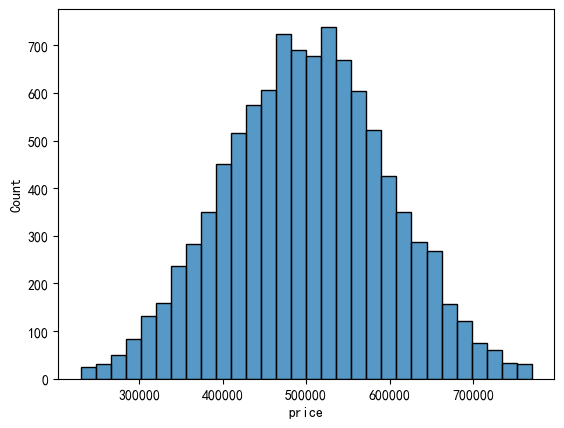

In [30]:
import seaborn as sns
sns.histplot(data=data, x="price",bins=30)

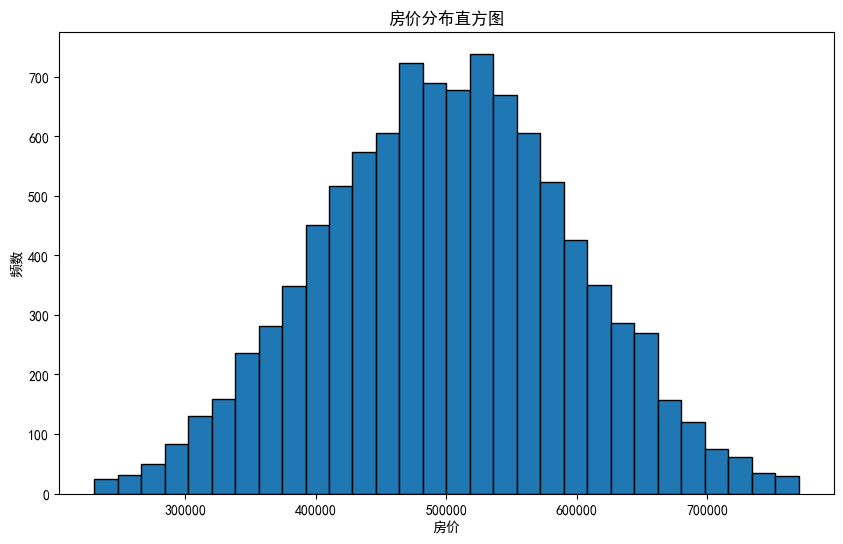

In [31]:
# 房价分布直方图
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, edgecolor='k')
plt.title('房价分布直方图')
plt.xlabel('房价')
plt.ylabel('频数')
plt.show()

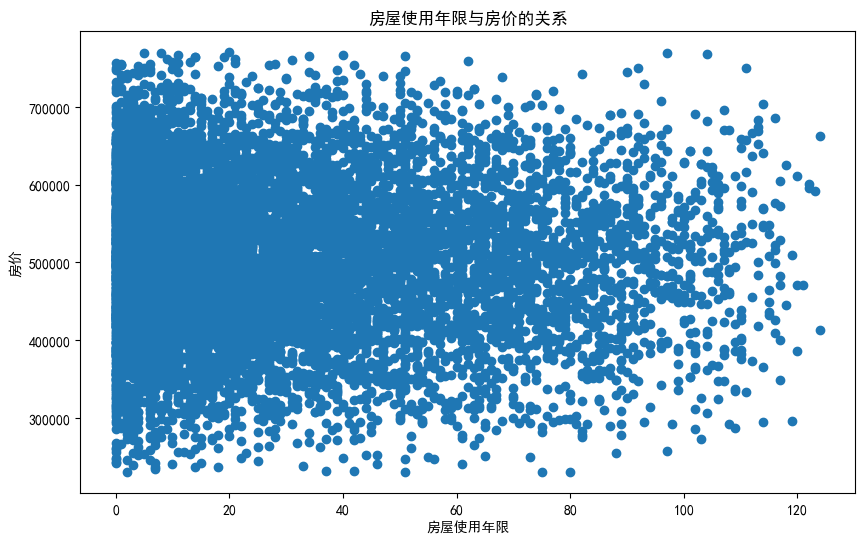

In [32]:
# 房屋使用年限与房价的散点图
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['price'])
plt.title('房屋使用年限与房价的关系')
plt.xlabel('房屋使用年限')
plt.ylabel('房价')
plt.show()
